In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [229]:
diabetes_df.shape

(768, 9)

In [230]:
diabetes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [231]:
diabetes_df.Outcome.unique()

array([1, 0])

0    500
1    268
Name: Outcome, dtype: int64


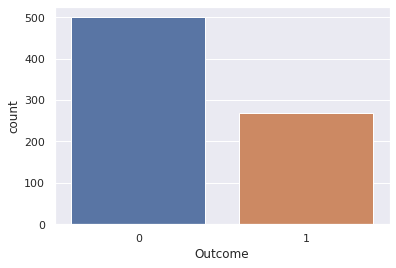

In [232]:
print(diabetes_df.Outcome.value_counts())
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=diabetes_df)

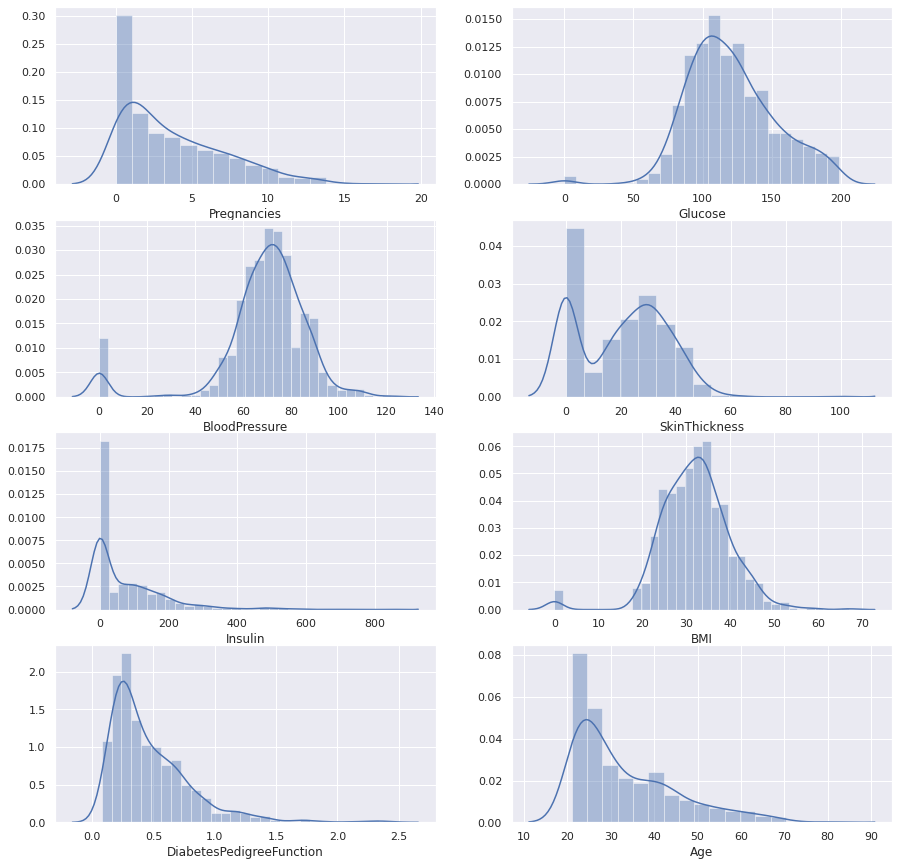

In [233]:
fig, ax2 = plt.subplots(4, 2, figsize=(15, 15))
sns.distplot(diabetes_df['Pregnancies'],ax=ax2[0][0])
sns.distplot(diabetes_df['Glucose'],ax=ax2[0][1])
sns.distplot(diabetes_df['BloodPressure'],ax=ax2[1][0])
sns.distplot(diabetes_df['SkinThickness'],ax=ax2[1][1])
sns.distplot(diabetes_df['Insulin'],ax=ax2[2][0])
sns.distplot(diabetes_df['BMI'],ax=ax2[2][1])
sns.distplot(diabetes_df['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(diabetes_df['Age'],ax=ax2[3][1])

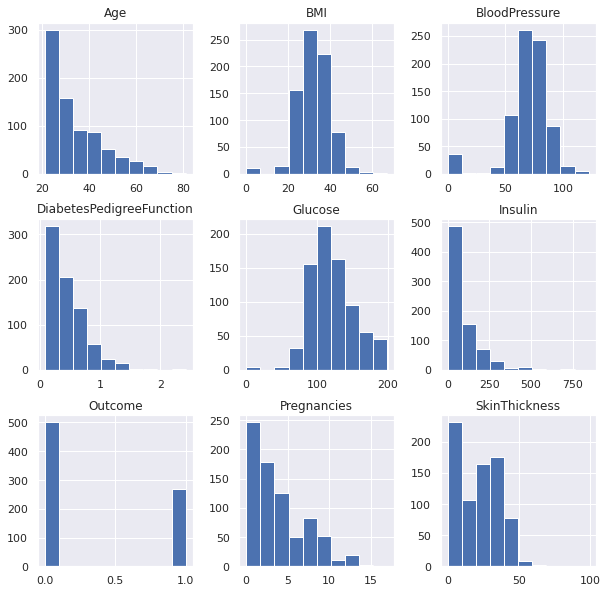

In [234]:
p = diabetes_df.hist(figsize = (10,10))

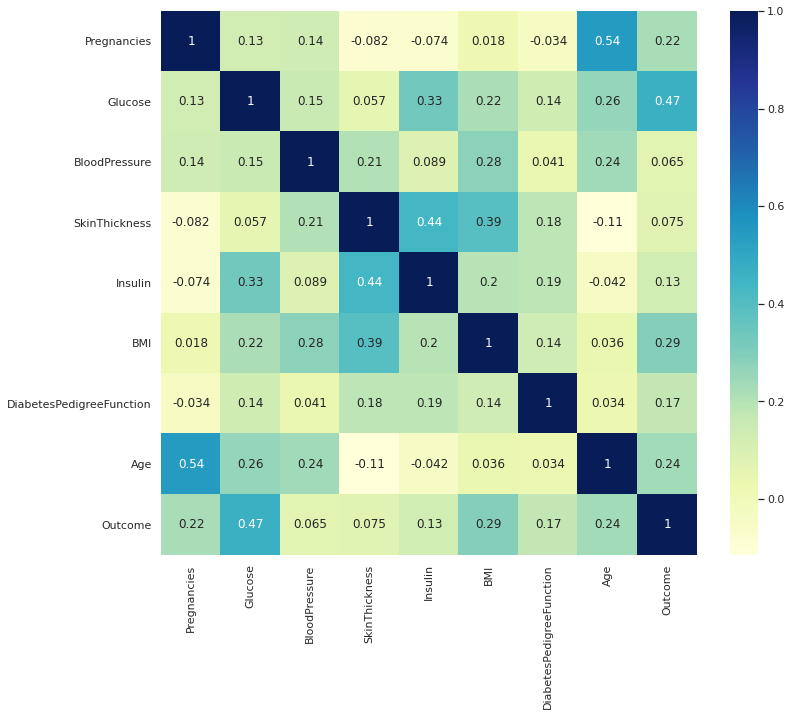

In [235]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(diabetes_df.corr(), annot=True,cmap ='YlGnBu')

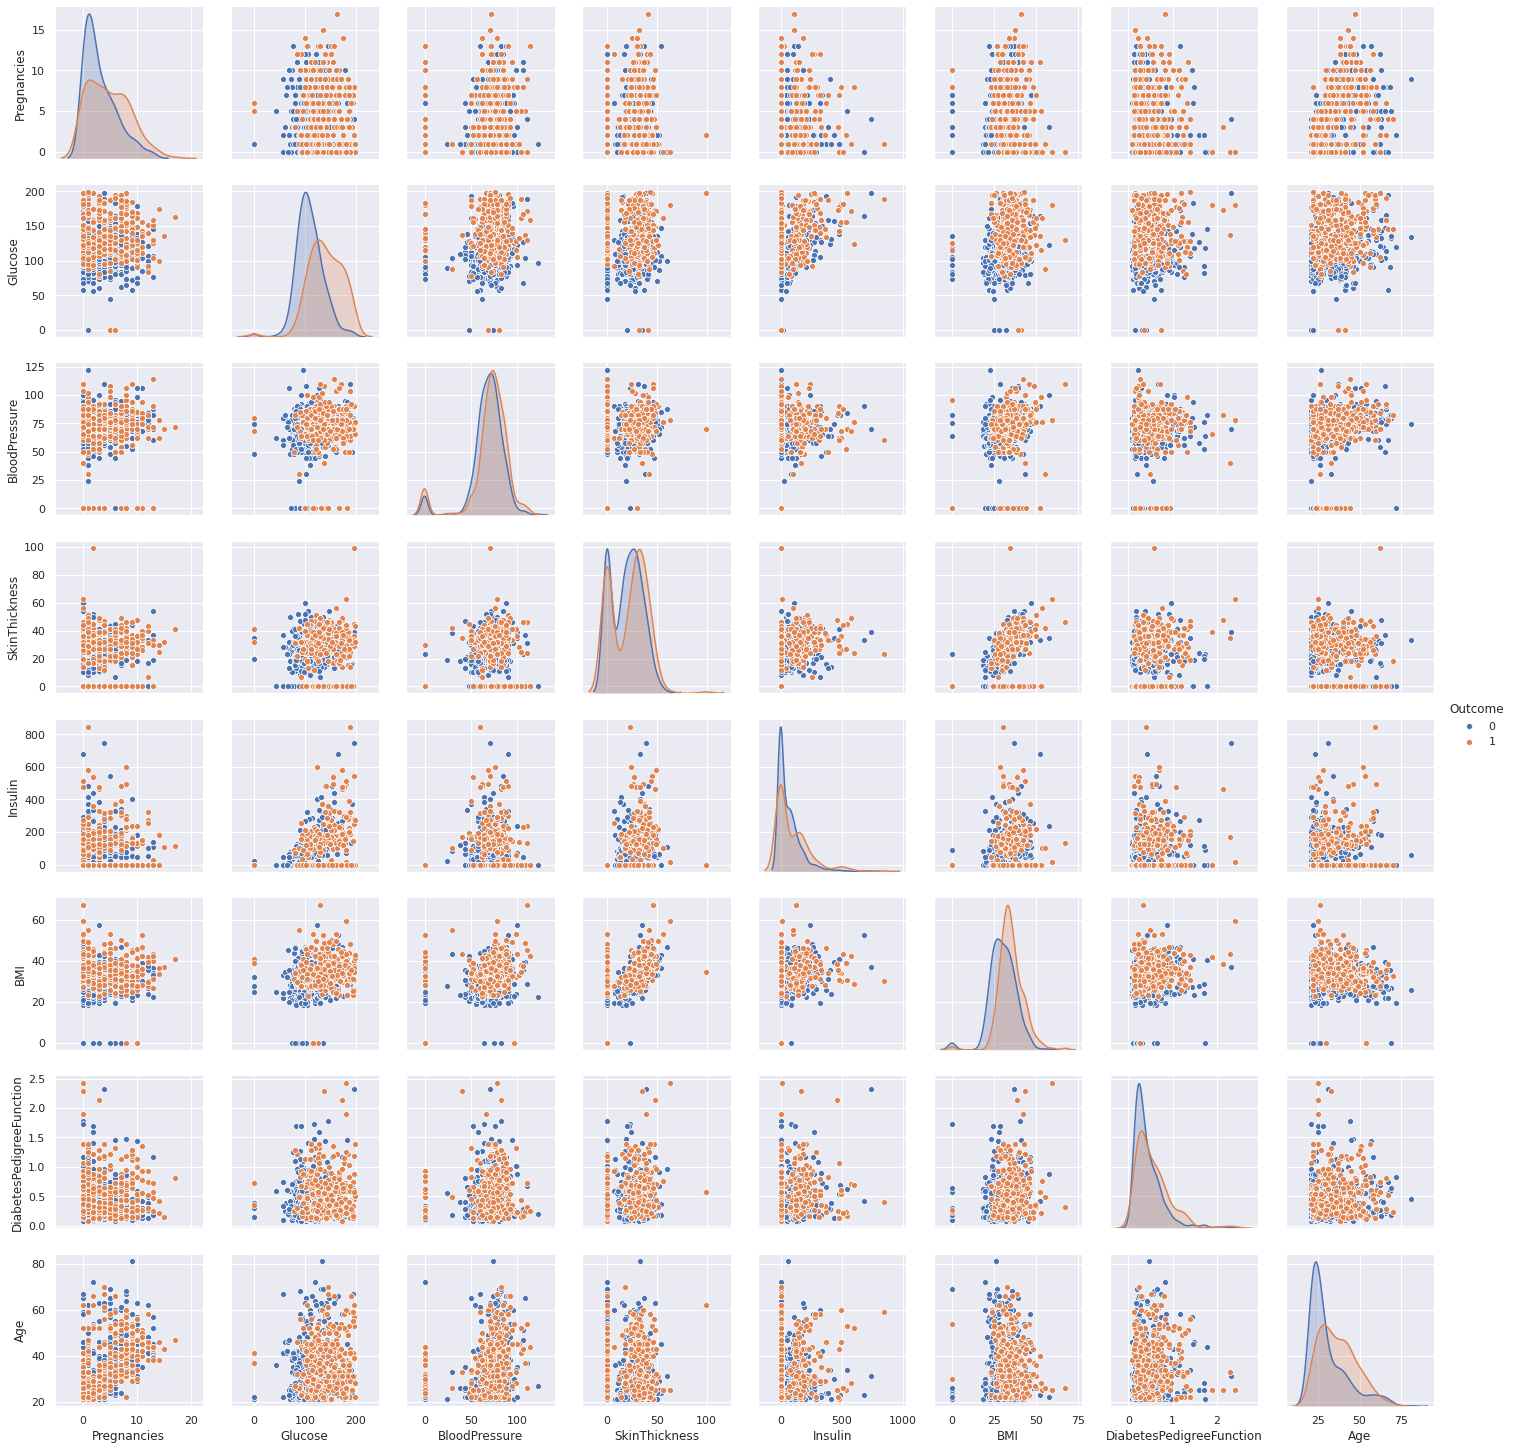

In [236]:
p=sns.pairplot(diabetes_df, hue = 'Outcome')

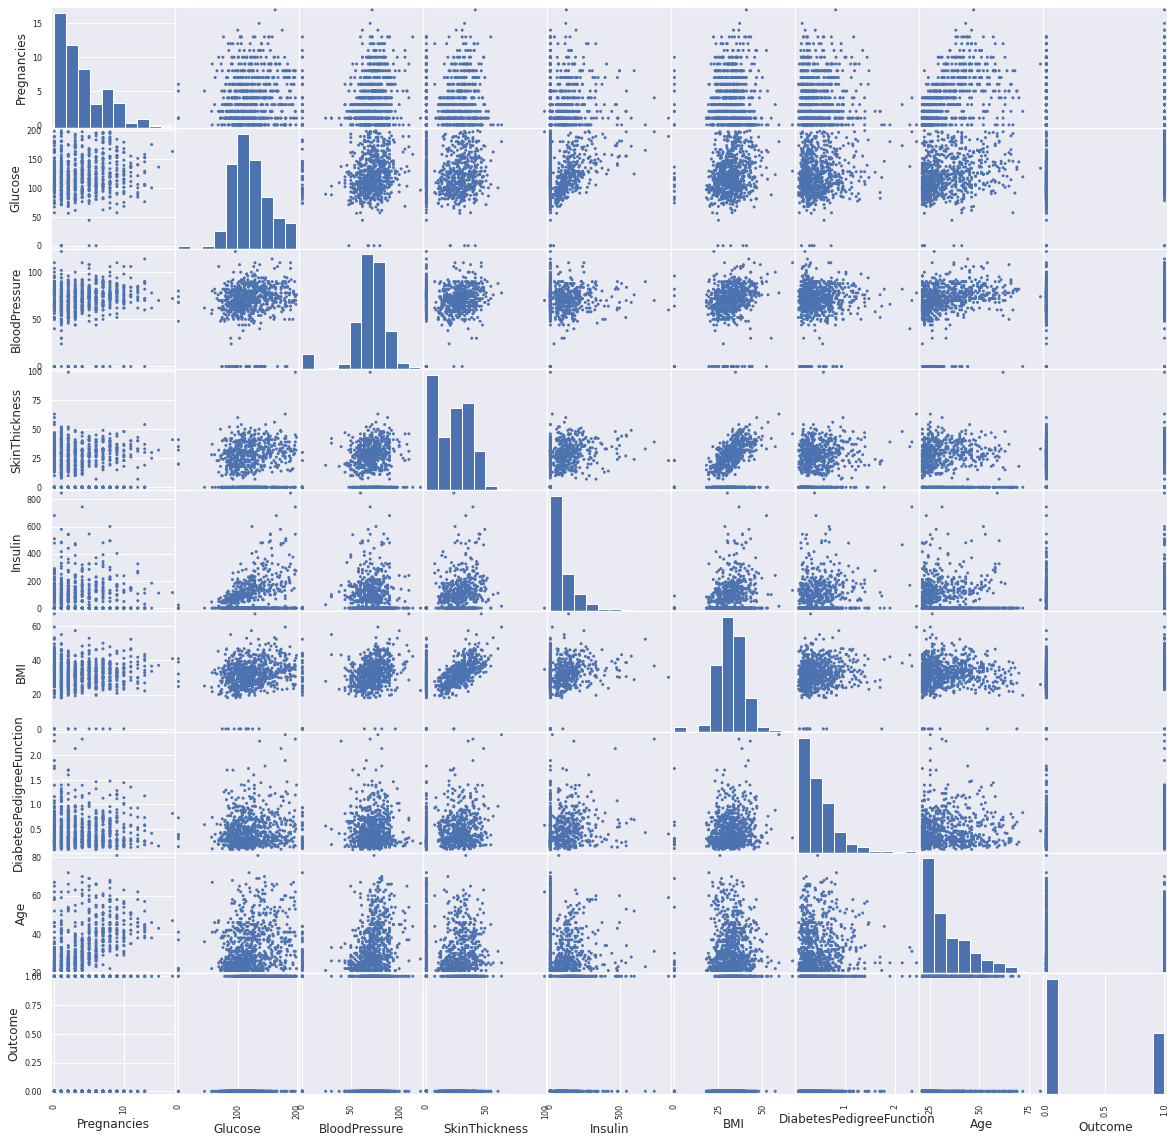

In [237]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(20,20))
p = scatter_matrix(diabetes_df, alpha=1, ax=ax)


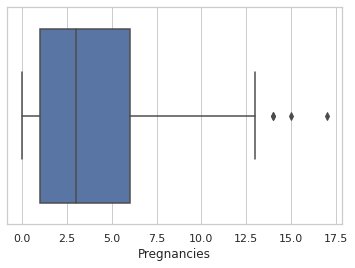

In [238]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["Pregnancies"])

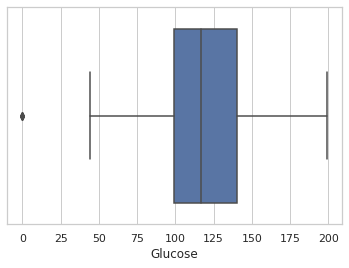

In [239]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["Glucose"])

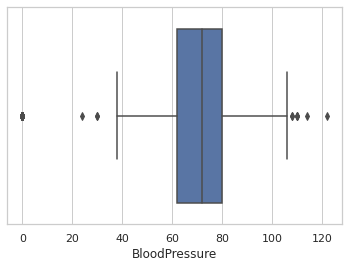

In [240]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["BloodPressure"])

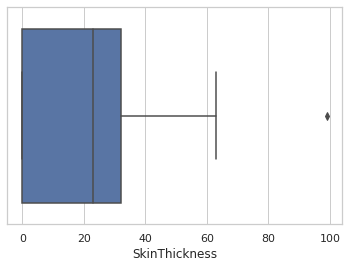

In [241]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["SkinThickness"])

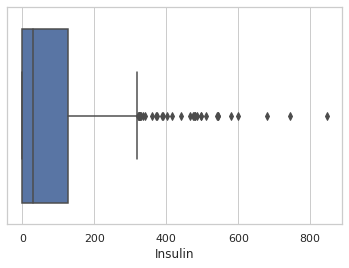

In [242]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["Insulin"])

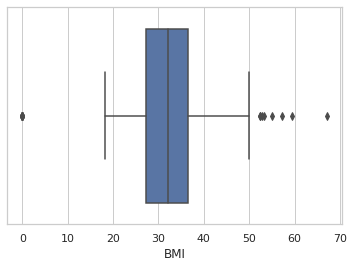

In [243]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["BMI"])

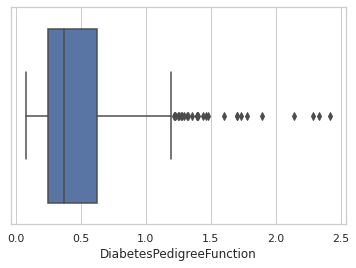

In [244]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["DiabetesPedigreeFunction"])

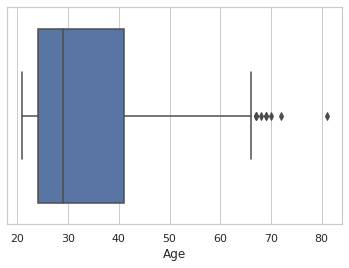

In [245]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diabetes_df["Age"])

In [246]:
#remove outlier values
from scipy import stats
z_scores = stats.zscore(diabetes_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetes_df_n = diabetes_df[filtered_entries]

print(diabetes_df_n)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
5              5      116  ...   30        0
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[688 rows x 9 columns]


0    461
1    227
Name: Outcome, dtype: int64


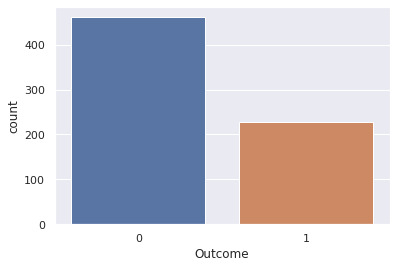

In [247]:
print(diabetes_df_n.Outcome.value_counts())
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=diabetes_df_n)

In [248]:
diabetes_df_n.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [249]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The Question creeping out of this summary
Can minimum value of below listed columns be zero (0)?
On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose,BloodPressure,SkinThickness,Insulin,BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [0]:
diabetes_df_final = diabetes_df_n.copy(deep = True)
diabetes_df_final[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_final[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN) 

In [251]:
print(diabetes_df_final.isnull().sum())


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               190
Insulin                     324
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Aiming to impute nan values of the columns with the column mean value

In [0]:
diabetes_df_final['Glucose'].fillna(diabetes_df_final['Glucose'].mean(), inplace = True)
diabetes_df_final['BloodPressure'].fillna(diabetes_df_final['BloodPressure'].mean(), inplace = True)
diabetes_df_final['SkinThickness'].fillna(diabetes_df_final['SkinThickness'].median(), inplace = True)
diabetes_df_final['Insulin'].fillna(diabetes_df_final['Insulin'].median(), inplace = True)
diabetes_df_final['BMI'].fillna(diabetes_df_final['BMI'].median(), inplace = True)

In [253]:
print(diabetes_df_final.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Plotting after Nan removal

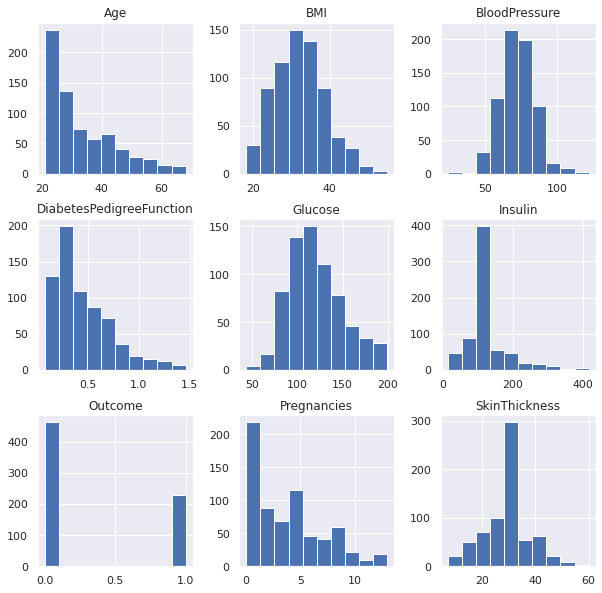

In [254]:
plt=  diabetes_df_final.hist(figsize = (10,10))

In [0]:
diabetes_df_final.to_csv('Diabetes_data_processed.csv')


KNN Classification

In [0]:
X = diabetes_df_final.iloc[:,:-1].values
y = diabetes_df_final.iloc[:,8].values
X

In [0]:
print(X.shape)
print(y.shape)

In [0]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [775]:
print(X_train.shape)
print(y_train.shape)

(460, 8)
(460,)


In [776]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train,y_train)
y_predict = knn.predict(X_test)
y_predict

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[133  23]
 [ 32  40]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       156
           1       0.63      0.56      0.59        72

    accuracy                           0.76       228
   macro avg       0.72      0.70      0.71       228
weighted avg       0.75      0.76      0.75       228



In [777]:
#Try running from k=1 through 50 and perform cross validation to get error values

from sklearn.model_selection import cross_val_score
k_range=range(1,50)
scores,val_scores,errorlist = [],[],[]
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    scores = cross_val_score(knn_model, X_train, y_train, scoring = 'accuracy', cv=6)
    val_scores.append(scores.mean())
for value in val_scores:
    errorlist.append(1-value)

#finding minimum error value and returning the index position of it to find the best K

optimal_k_value = k_range[errorlist.index(min(errorlist))]
optimal_model = KNeighborsClassifier(n_neighbors=optimal_k_value).fit(X_train,y_train)

#finding the accuracy for the best k value

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, optimal_model.predict(X_test))
print("Accuracy for optimal K value = {0} is {1}".format(optimal_k_value, (accuracy*100)))


Accuracy for optimal K value = 8 is 78.94736842105263


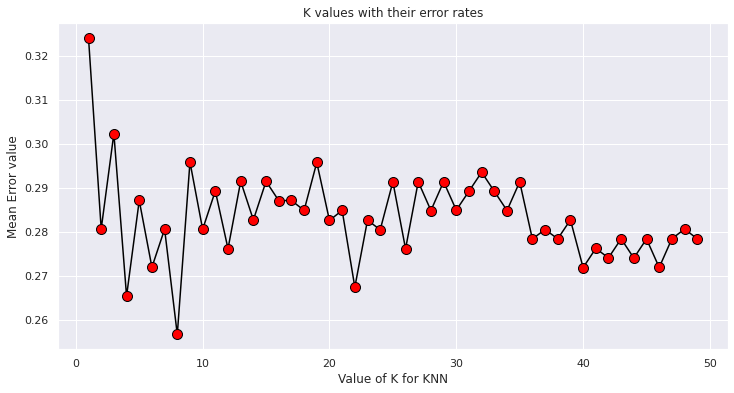

In [780]:
#plot the relationship between K and the error value
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(k_range,errorlist,color="black",marker="o",markerfacecolor="red",markersize=10)
plt.title("K values with their error rates")
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Error value')
plt.show()

In [781]:
def cross_entropy(prediction, target, epsilon=1e-10):
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    return (-np.sum(np.sum(target * np.log(prediction + 1e-5)))/(prediction.shape[0]))
     
cross_entropy_loss = cross_entropy(y_predict, y_test)
print ("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 1.6158460302045932


In [782]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict) 
print("Mean Square value:",mse)

Mean Square value: 0.2412280701754386


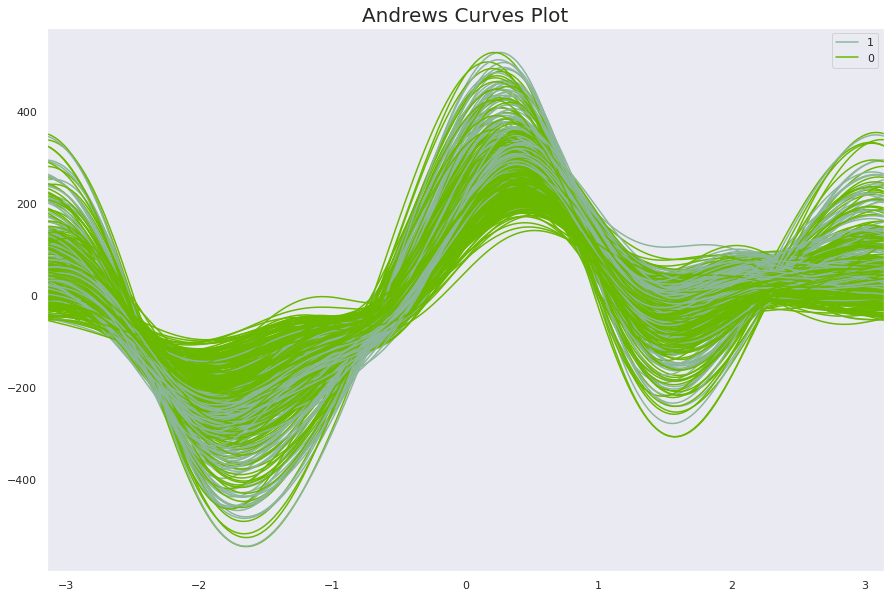

In [783]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(15,10))
andrews_curves(diabetes_df_final, 'Outcome')
plt.title('Andrews Curves Plot', fontsize=20)
plt.show()

Text(0, 0.5, 'Outcome')

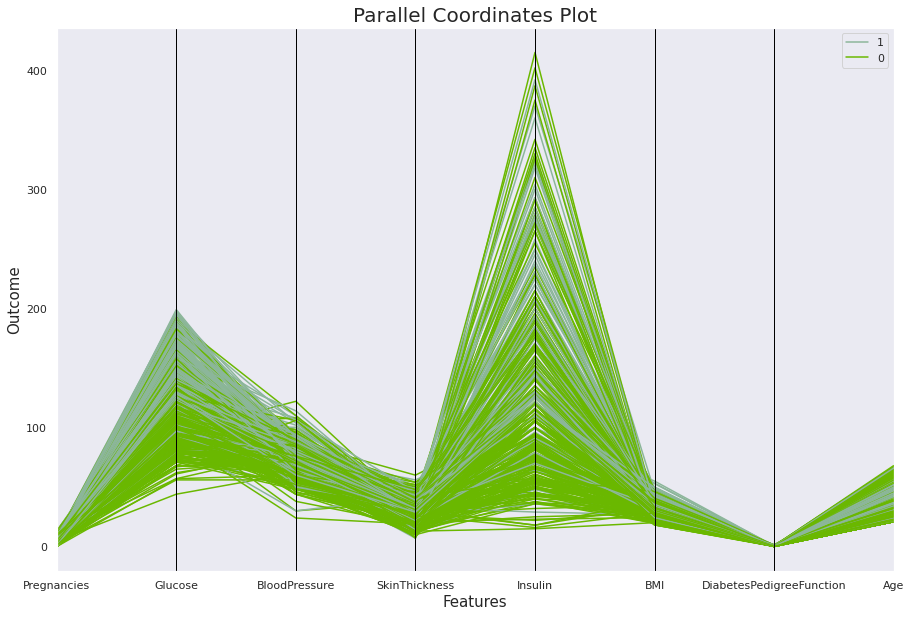

In [784]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (15,10))
pd.plotting.parallel_coordinates(diabetes_df_final,'Outcome')
plt.title('Parallel Coordinates Plot', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Outcome', fontsize=15)

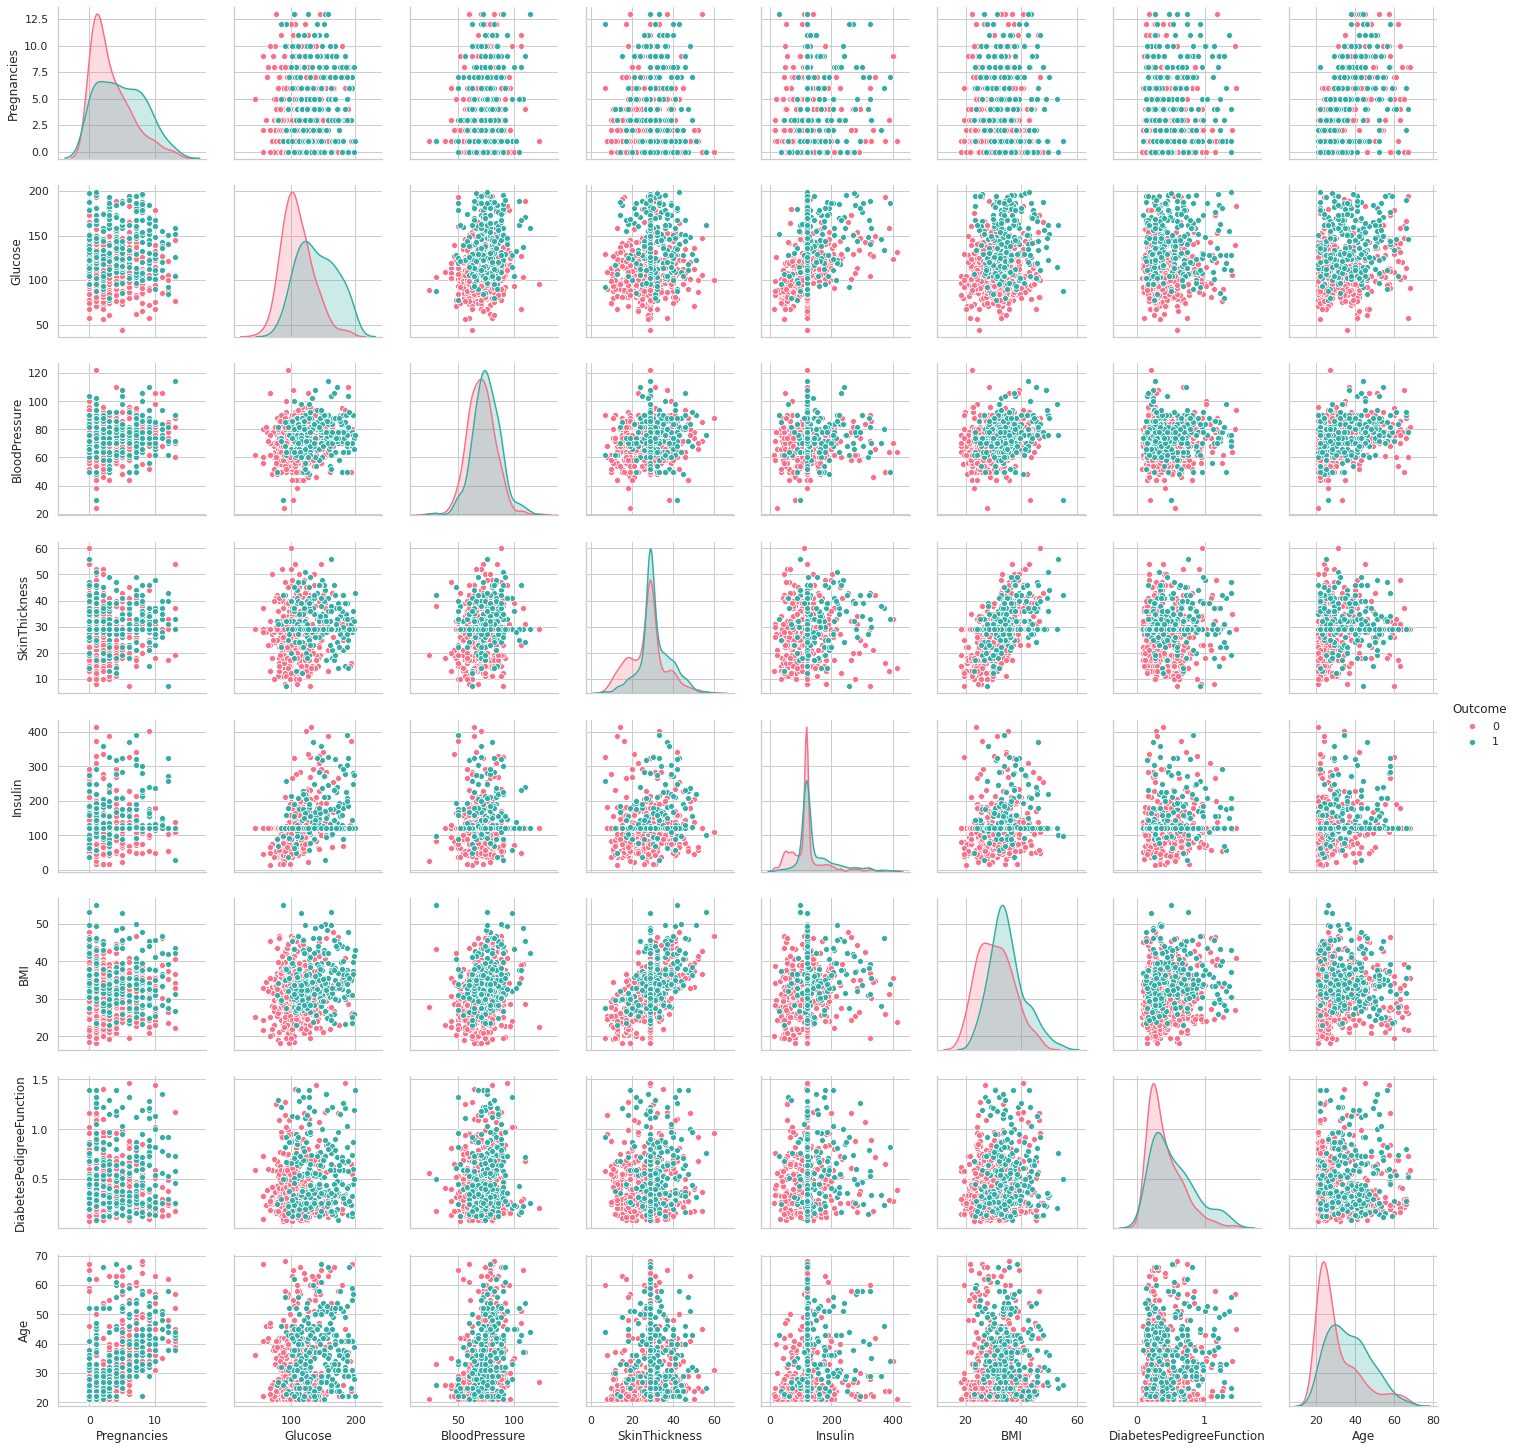

In [808]:
p=sns.pairplot(diabetes_df_final, hue = 'Outcome', palette='husl')

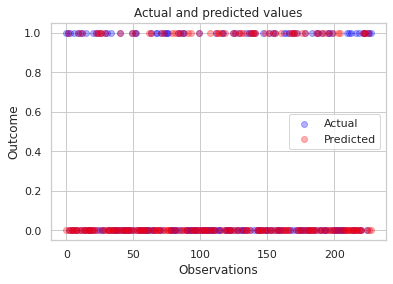

In [810]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predict.size), y=y_predict, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Outcome')
plt.legend()
plt.show()